# PCA through Singular Value Decomposition

In [4]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
# R = np.cov(X)
R=np.matmul(X,X.T)/3

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

print("u1 =", u1)
print("u2 =", u2)

# Calculate the coordinates in new orthonormal basis:

X_proj = np.dot(U.T, X)
X_proj[1,:]=[0,0,0]
print(X_proj)
# Calculate the approximation of the original from new basis
# print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original
X_reconstructed = np.dot(U,X_proj)
print(X_reconstructed)


u1 = [-0.40455358 -0.9145143 ]
u2 = [-0.9145143   0.40455358]
[[-4.46716435 -3.14809647  0.        ]
 [ 0.          0.          0.        ]]
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]


# PCA on Iris data

In [5]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

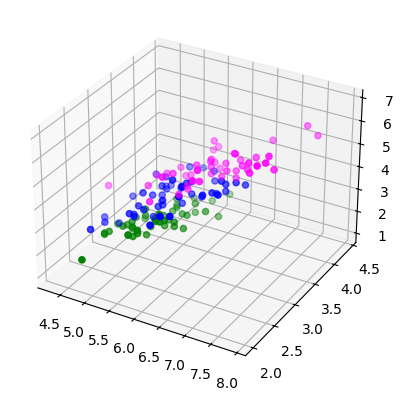

In [6]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,0],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,0],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,0],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

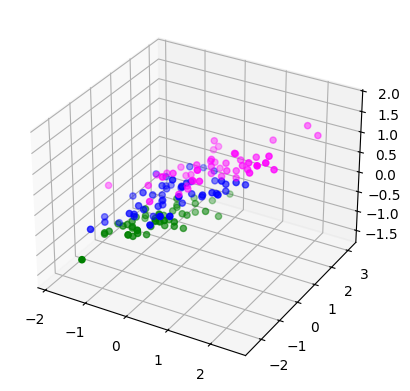

In [17]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)

## Pre-processing 1. Using Standard Scaler -> Xpp
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show


0.0
0.0


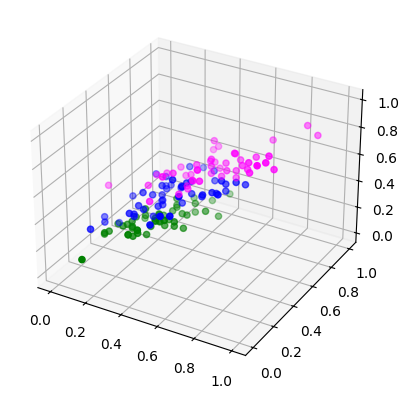

In [19]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)

## Pre-processing 2. Using MinMaxScaler -> Xpp
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import MinMaxScaler
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show
print(np.min(Xpp[:,1]))
print(np.min(Xpp[:,1]))

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

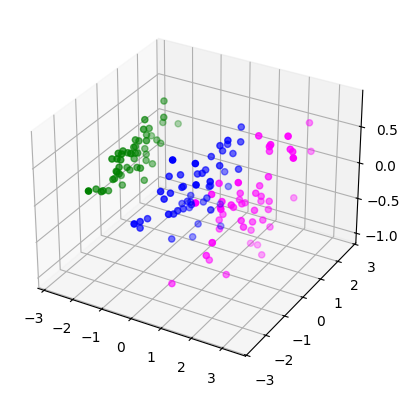

In [8]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)

## Using Standard Scaler -> Xpca
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [12]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
print(pca.explained_variance_)

[2.93808505 0.9201649  0.14774182]


In [13]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


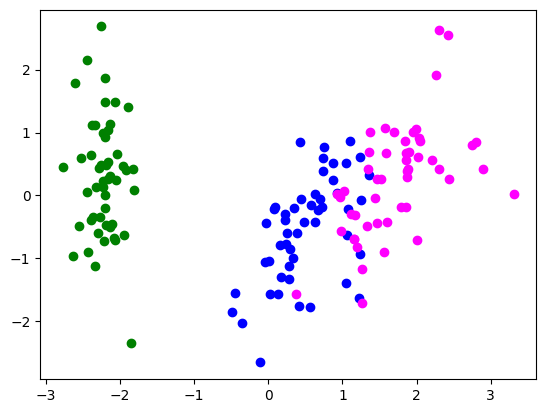

In [11]:
# Plot the principal components in 2D, mark different targets in color

plt.scatter(Xpca[y == 0,0], Xpca[y == 0,1], color ='green', label = "Classe 0" )
plt.scatter(Xpca[y == 1,0], Xpca[y == 1,1], color ='blue', label = "Classe 1" )
plt.scatter(Xpca[y == 2,0], Xpca[y == 2,1], color ='magenta', label = "Classe 2" )

# KNN classifier

Accuracy: 0.9777777777777777


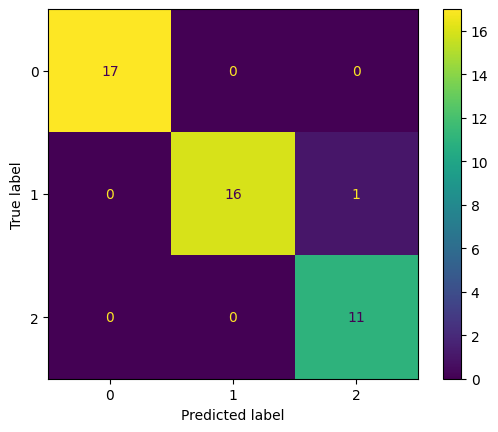

In [24]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size = 0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("Accuracy:", knn1.score(X_test, y_test))
confusion_matrix(y_test,Ypred)
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



Accuracy: 0.9777777777777777


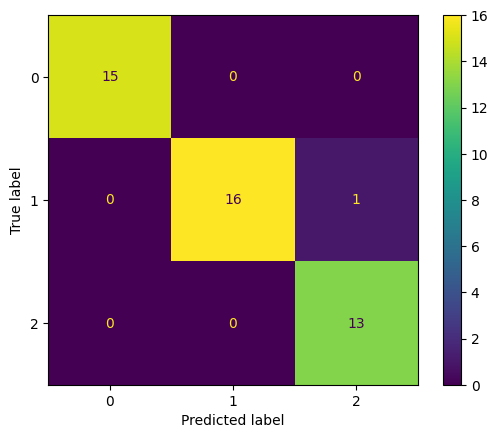

In [25]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(Xpca[:, 0:3], y, test_size=0.3)

knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)

print ("Accuracy:", knn1.score(X_test, y_test))
confusion_matrix(y_test,y_pred1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

Accuracy: 0.8888888888888888


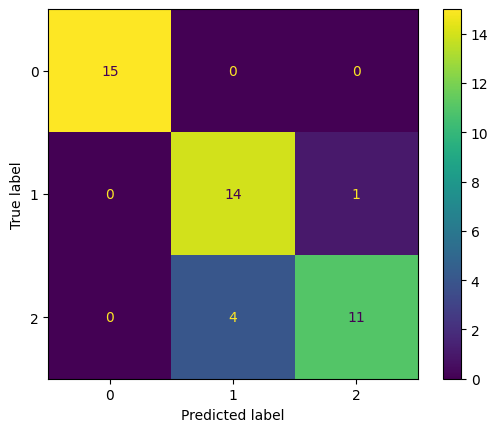

In [26]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Xpca[:,:2], y, test_size=0.3, random_state=42, stratify=y)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(Xpca_train, ypca_train)
ypca_pred = knn2.predict(Xpca_test)

print("Accuracy:", knn2.score(Xpca_test, ypca_test))
confusion_matrix(ypca_test,ypca_pred)
ConfusionMatrixDisplay.from_predictions(ypca_test, ypca_pred)
